In [1]:
#import libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
plt.rcParams['figure.figsize']=(10,6) # Adjust configuration of plots we create

# Importing Transcation data
#d_parser=lambda x: pd.datetime.strptime(x,'%Y-%m-%d %I-%p')
df = pd.read_excel(r"C:\Users\OTAS\Downloads\QVI_transaction_data.xlsx") #, parse_dates=['DATE'], date_format=d_parser)


print (df)


         DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0       43390          1            1000       1         5   
1       43599          1            1307     348        66   
2       43605          1            1343     383        61   
3       43329          2            2373     974        69   
4       43330          2            2426    1038       108   
...       ...        ...             ...     ...       ...   
264831  43533        272          272319  270088        89   
264832  43325        272          272358  270154        74   
264833  43410        272          272379  270187        51   
264834  43461        272          272379  270188        42   
264835  43365        272          272380  270189        74   

                                       PROD_NAME  PROD_QTY  TOT_SALES  
0         Natural Chip        Compny SeaSalt175g         2        6.0  
1                       CCs Nacho Cheese    175g         3        6.3  
2         Smiths Crinkle Cut  Chips Chi

In [2]:
#Converting datatype from integer to datatime

df['DATE']=pd.to_datetime(df['DATE'], origin='1899-12-30', unit='D')
#df['DATE_str']=df['DATE'].dt.strftime ('%d-%m-%Y')
df['DATE']=pd.to_datetime(df['DATE'].dt.strftime('%d-%m-%Y'), format='%d-%m-%Y')

df


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [3]:
df.dtypes
df['DATE'].dt.day_name()

0         Wednesday
1           Tuesday
2            Monday
3            Friday
4          Saturday
            ...    
264831     Saturday
264832       Monday
264833      Tuesday
264834     Thursday
264835     Saturday
Name: DATE, Length: 264836, dtype: object

In [4]:
df['Dayofweek']=df['DATE'].dt.day_name()
df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Dayofweek
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,Wednesday
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,Tuesday
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,Monday
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,Friday
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,Saturday
...,...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,Saturday
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,Monday
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,Tuesday
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,Thursday


In [5]:
#Getting a summary of the product_name
df['PROD_NAME'].describe()

count                                     264836
unique                                       114
top       Kettle Mozzarella   Basil & Pesto 175g
freq                                        3304
Name: PROD_NAME, dtype: object

In [6]:
#finding unique product names

print(df['PROD_NAME'].unique())

['Natural Chip        Compny SeaSalt175g' 'CCs Nacho Cheese    175g'
 'Smiths Crinkle Cut  Chips Chicken 170g'
 'Smiths Chip Thinly  S/Cream&Onion 175g'
 'Kettle Tortilla ChpsHny&Jlpno Chili 150g'
 'Old El Paso Salsa   Dip Tomato Mild 300g'
 'Smiths Crinkle Chips Salt & Vinegar 330g'
 'Grain Waves         Sweet Chilli 210g'
 'Doritos Corn Chip Mexican Jalapeno 150g'
 'Grain Waves Sour    Cream&Chives 210G'
 'Kettle Sensations   Siracha Lime 150g' 'Twisties Cheese     270g'
 'WW Crinkle Cut      Chicken 175g' 'Thins Chips Light&  Tangy 175g'
 'CCs Original 175g' 'Burger Rings 220g'
 'NCC Sour Cream &    Garden Chives 175g'
 'Doritos Corn Chip Southern Chicken 150g' 'Cheezels Cheese Box 125g'
 'Smiths Crinkle      Original 330g'
 'Infzns Crn Crnchers Tangy Gcamole 110g'
 'Kettle Sea Salt     And Vinegar 175g'
 'Smiths Chip Thinly  Cut Original 175g' 'Kettle Original 175g'
 'Red Rock Deli Thai  Chilli&Lime 150g' 'Pringles Sthrn FriedChicken 134g'
 'Pringles Sweet&Spcy BBQ 134g' 'Red Rock 

In [7]:
#Checking for only potato chips and removing special caharacters

df_filtered=df[df['PROD_NAME'].str.contains('Chip', case=False, na=False)&
             ~df['PROD_NAME'].str.contains(r'&', regex=True, na=False)
               ]         
print(df_filtered)

             DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0      2018-10-17          1            1000       1         5   
2      2019-05-20          1            1343     383        61   
8      2018-08-20          5            5026    4525        42   
18     2018-08-17         22           22456   18696        93   
26     2018-08-19         39           39167   35638       111   
...           ...        ...             ...     ...       ...   
264804 2018-09-24        270          270110  267361        27   
264809 2018-08-24        271          271051  268506        47   
264816 2019-05-29        271          271193  269366        75   
264826 2019-03-25        272          272194  269908        75   
264834 2018-12-27        272          272379  270188        42   

                                      PROD_NAME  PROD_QTY  TOT_SALES  \
0        Natural Chip        Compny SeaSalt175g         2        6.0   
2        Smiths Crinkle Cut  Chips Chicken 170g         2      

In [8]:
#Removing digits

df['PROD_NAME_NEW']=df['PROD_NAME'].str.replace(r'\d+\.?\d*\w*', '', regex=True)
print(df)

             DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0      2018-10-17          1            1000       1         5   
1      2019-05-14          1            1307     348        66   
2      2019-05-20          1            1343     383        61   
3      2018-08-17          2            2373     974        69   
4      2018-08-18          2            2426    1038       108   
...           ...        ...             ...     ...       ...   
264831 2019-03-09        272          272319  270088        89   
264832 2018-08-13        272          272358  270154        74   
264833 2018-11-06        272          272379  270187        51   
264834 2018-12-27        272          272379  270188        42   
264835 2018-09-22        272          272380  270189        74   

                                       PROD_NAME  PROD_QTY  TOT_SALES  \
0         Natural Chip        Compny SeaSalt175g         2        6.0   
1                       CCs Nacho Cheese    175g         3   

In [9]:
#Sorting distinct words based on frequency

all_words = ' '.join(df['PROD_NAME_NEW']).split()

# Convert to pandas Series and count occurrences
word_counts = pd.Series(all_words).value_counts()

print(word_counts)

Chips      49770
Kettle     41288
&          35565
Smiths     28860
Salt       27976
           ...  
Whlegrn     1432
Pc          1431
Garden      1419
NCC         1419
Fries       1418
Name: count, Length: 196, dtype: int64


In [10]:
# Create a boolean mask to check for 'salsa' (case-insensitive)
df['SALSA'] = df['PROD_NAME_NEW'].str.contains('salsa', case=False)

# Remove rows containing 'salsa'
df = df[df['SALSA'] == False]

# Drop the 'SALSA' column
df = df.drop(columns=['SALSA'])


print(df)

             DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0      2018-10-17          1            1000       1         5   
1      2019-05-14          1            1307     348        66   
2      2019-05-20          1            1343     383        61   
3      2018-08-17          2            2373     974        69   
4      2018-08-18          2            2426    1038       108   
...           ...        ...             ...     ...       ...   
264831 2019-03-09        272          272319  270088        89   
264832 2018-08-13        272          272358  270154        74   
264833 2018-11-06        272          272379  270187        51   
264834 2018-12-27        272          272379  270188        42   
264835 2018-09-22        272          272380  270189        74   

                                       PROD_NAME  PROD_QTY  TOT_SALES  \
0         Natural Chip        Compny SeaSalt175g         2        6.0   
1                       CCs Nacho Cheese    175g         3   

In [11]:
df.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246742,246742.000000,2.467420e+05,2.467420e+05,246742.000000,246742.000000,246742.000000
mean,2018-12-30 01:19:01.211467520,135.051098,1.355310e+05,1.351311e+05,56.351789,1.908062,7.321322
min,2018-07-01 00:00:00,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,2018-09-30 00:00:00,70.000000,7.001500e+04,6.756925e+04,26.000000,2.000000,5.800000
50%,2018-12-30 00:00:00,130.000000,1.303670e+05,1.351830e+05,53.000000,2.000000,7.400000
75%,2019-03-31 00:00:00,203.000000,2.030840e+05,2.026538e+05,87.000000,2.000000,8.800000
max,2019-06-30 00:00:00,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000
std,NaN,76.787096,8.071528e+04,7.814772e+04,33.695428,0.659831,3.077828


In [12]:
#Filtering the outlier dataset

outlier_transcation=df[df["PROD_QTY"]==200]

print(outlier_transcation)

            DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
69762 2018-08-19        226          226000  226201         4   
69763 2019-05-20        226          226000  226210         4   

                              PROD_NAME  PROD_QTY  TOT_SALES Dayofweek  \
69762  Dorito Corn Chp     Supreme 380g       200      650.0    Sunday   
69763  Dorito Corn Chp     Supreme 380g       200      650.0    Monday   

                      PROD_NAME_NEW  
69762  Dorito Corn Chp     Supreme   
69763  Dorito Corn Chp     Supreme   


In [13]:
#Filtering out consumer based on loyalty_card number
LC= df[df['LYLTY_CARD_NBR']!=226000]

print(LC)

             DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0      2018-10-17          1            1000       1         5   
1      2019-05-14          1            1307     348        66   
2      2019-05-20          1            1343     383        61   
3      2018-08-17          2            2373     974        69   
4      2018-08-18          2            2426    1038       108   
...           ...        ...             ...     ...       ...   
264831 2019-03-09        272          272319  270088        89   
264832 2018-08-13        272          272358  270154        74   
264833 2018-11-06        272          272379  270187        51   
264834 2018-12-27        272          272379  270188        42   
264835 2018-09-22        272          272380  270189        74   

                                       PROD_NAME  PROD_QTY  TOT_SALES  \
0         Natural Chip        Compny SeaSalt175g         2        6.0   
1                       CCs Nacho Cheese    175g         3   

In [14]:
#reexamine transcation date
LC.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246740,246740.000000,2.467400e+05,2.467400e+05,246740.000000,246740.000000,246740.000000
mean,2018-12-30 01:18:58.448569344,135.050361,1.355303e+05,1.351304e+05,56.352213,1.906456,7.316113
min,2018-07-01 00:00:00,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,2018-09-30 00:00:00,70.000000,7.001500e+04,6.756875e+04,26.000000,2.000000,5.800000
50%,2018-12-30 00:00:00,130.000000,1.303670e+05,1.351815e+05,53.000000,2.000000,7.400000
75%,2019-03-31 00:00:00,203.000000,2.030832e+05,2.026522e+05,87.000000,2.000000,8.800000
max,2019-06-30 00:00:00,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000
std,NaN,76.786971,8.071520e+04,7.814760e+04,33.695235,0.342499,2.474897


In [15]:
#Finding No of transcations per date

Transcation_per_date=df['DATE'].value_counts().sort_index()

Transcation_per_date.describe()

count    364.000000
mean     677.862637
std       33.689358
min      607.000000
25%      658.000000
50%      674.000000
75%      694.250000
max      865.000000
Name: count, dtype: float64

In [16]:
#Finding missing dates
all_dates = pd.date_range(start=df['DATE'].min(), end=df['DATE'].max(), freq='D')
missing_dates = all_dates.difference(pd.to_datetime(df['DATE']))

# Print missing dates
print(missing_dates)

DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq='D')


          DATE  count
0   2018-07-01  663.0
1   2018-07-02  650.0
2   2018-07-03  674.0
3   2018-07-04  669.0
4   2018-07-05  660.0
..         ...    ...
360 2019-06-26  657.0
361 2019-06-27  669.0
362 2019-06-28  673.0
363 2019-06-29  703.0
364 2019-06-30  704.0

[365 rows x 2 columns]


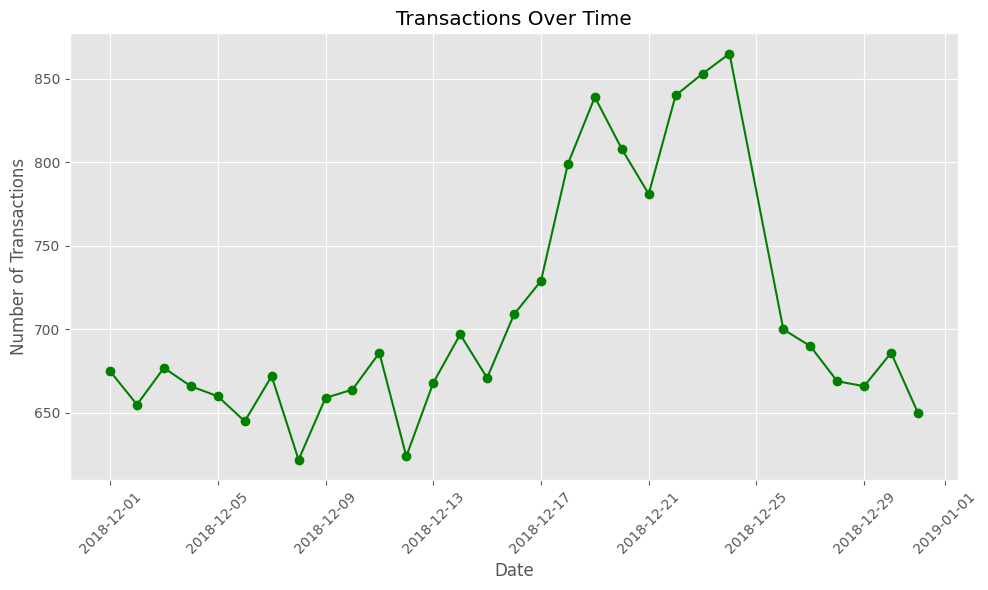

In [17]:
#Merging dates and count values together
all_dates = pd.date_range(start="2018-07-01", end="2019-06-30", freq='D')
df_december = df[df['DATE'].dt.month == 12]

Transcation_per_date_DEC=df_december.groupby(df_december['DATE']).size().reset_index(name='N')
merged_data = pd.DataFrame({'DATE': all_dates})
merged_data = pd.merge(merged_data, Transcation_per_date, how='left', left_on='DATE', right_on='DATE')

print(merged_data)
#Transcation_per_date=Transactions_by_date

#plot the number of transcations over time
plt.figure(figsize=(10, 6))
plt.plot(Transcation_per_date_DEC['DATE'], Transcation_per_date_DEC['N'], marker='o', linestyle='-', color='g')
plt.title('Transactions Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()



In [18]:
#EXTRACTING PACK SIZE FROM PROD_NAME
df['PACK_SIZE'] = df['PROD_NAME'].str.extract(r'(\d+)', expand=False).astype(float)

print(df[['PROD_NAME_NEW', 'PACK_SIZE']])

                               PROD_NAME_NEW  PACK_SIZE
0         Natural Chip        Compny SeaSalt      175.0
1                       CCs Nacho Cheese          175.0
2         Smiths Crinkle Cut  Chips Chicken       170.0
3         Smiths Chip Thinly  S/Cream&Onion       175.0
4       Kettle Tortilla ChpsHny&Jlpno Chili       150.0
...                                      ...        ...
264831   Kettle Sweet Chilli And Sour Cream       175.0
264832             Tostitos Splash Of  Lime       175.0
264833                  Doritos Mexicana          170.0
264834   Doritos Corn Chip Mexican Jalapeno       150.0
264835             Tostitos Splash Of  Lime       175.0

[246742 rows x 2 columns]


In [19]:
#Sorting/ ordering values to know the max and min pack size
df_sorted_asc = df.sort_values(by='PACK_SIZE', ascending=True)
print(df_sorted_asc)

             DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
229889 2018-10-11         33           33042   29694        38   
156193 2019-02-18         70           70048   67780        38   
95096  2018-09-26        209          209071  207883        38   
259246 2019-03-08         20           20172   17144        38   
30429  2018-09-18        271          271137  269005        38   
...           ...        ...             ...     ...       ...   
225830 2019-01-13        203          203332  203701         4   
34287  2018-12-06         24           24163   21219        14   
145130 2019-01-25        175          175285  176546        14   
130574 2018-07-12        196          196211  196728         4   
264807 2019-01-19        271          271013  268302         4   

                                      PROD_NAME  PROD_QTY  TOT_SALES  \
229889  Infuzions Mango     Chutny Papadums 70g         2        4.8   
156193  Infuzions Mango     Chutny Papadums 70g         2      

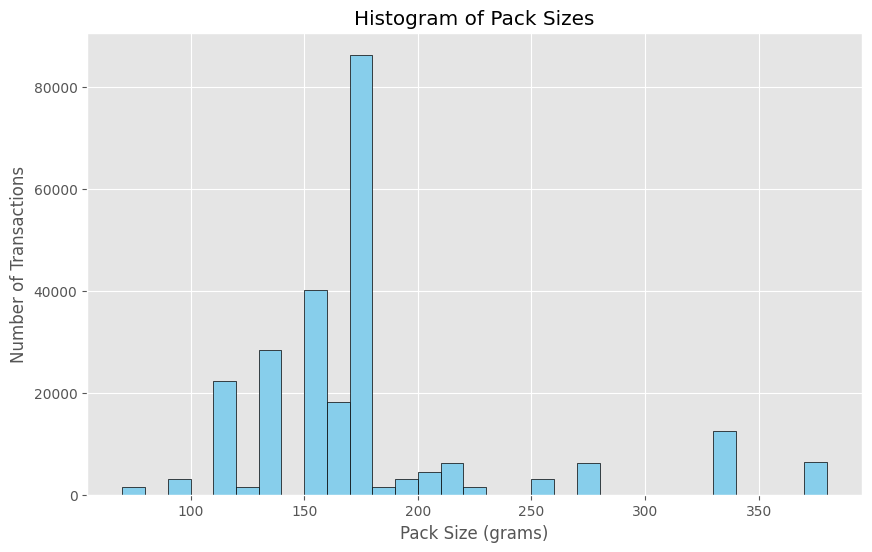

In [20]:
#plotting s history of transcations per pack size

plt.figure(figsize=(10, 6))
plt.hist(df['PACK_SIZE'], bins=np.arange(df['PACK_SIZE'].min(), df['PACK_SIZE'].max() + 1, 10), color='skyblue', edgecolor='black')
plt.title('Histogram of Pack Sizes')
plt.xlabel('Pack Size (grams)')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.show()

In [21]:
#Extract the first word from 'PROD_NAME' as the brand
df['BRAND_NAME'] = df['PROD_NAME'].str.split().str[0]

#MAKING ADJUSTMENTS TO NAMES
df['BRAND_NAME'] = df['BRAND_NAME'].replace({'RRD': 'RED'})
# Check the results to verify the brand extraction
print(df[['PROD_NAME', 'BRAND_NAME']])




                                       PROD_NAME BRAND_NAME
0         Natural Chip        Compny SeaSalt175g    Natural
1                       CCs Nacho Cheese    175g        CCs
2         Smiths Crinkle Cut  Chips Chicken 170g     Smiths
3         Smiths Chip Thinly  S/Cream&Onion 175g     Smiths
4       Kettle Tortilla ChpsHny&Jlpno Chili 150g     Kettle
...                                          ...        ...
264831   Kettle Sweet Chilli And Sour Cream 175g     Kettle
264832             Tostitos Splash Of  Lime 175g   Tostitos
264833                  Doritos Mexicana    170g    Doritos
264834   Doritos Corn Chip Mexican Jalapeno 150g    Doritos
264835             Tostitos Splash Of  Lime 175g   Tostitos

[246742 rows x 2 columns]


In [22]:

df.style.set_properties(**{'text-align': 'center'})
df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Dayofweek,PROD_NAME_NEW,PACK_SIZE,BRAND_NAME
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,Wednesday,Natural Chip Compny SeaSalt,175.0,Natural
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,Tuesday,CCs Nacho Cheese,175.0,CCs
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,Monday,Smiths Crinkle Cut Chips Chicken,170.0,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,Friday,Smiths Chip Thinly S/Cream&Onion,175.0,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,Saturday,Kettle Tortilla ChpsHny&Jlpno Chili,150.0,Kettle
...,...,...,...,...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,Saturday,Kettle Sweet Chilli And Sour Cream,175.0,Kettle
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,Monday,Tostitos Splash Of Lime,175.0,Tostitos
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,Tuesday,Doritos Mexicana,170.0,Doritos
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,Thursday,Doritos Corn Chip Mexican Jalapeno,150.0,Doritos


In [23]:
df2 =pd.read_csv(r"C:\Users\OTAS\Downloads\QVI_purchase_behaviour.csv")
df2

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


In [24]:
df2.dtypes


LYLTY_CARD_NBR       int64
LIFESTAGE           object
PREMIUM_CUSTOMER    object
dtype: object

In [25]:
Complete_dataset=df.merge(df2, how='left')

print(Complete_dataset)

             DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0      2018-10-17          1            1000       1         5   
1      2019-05-14          1            1307     348        66   
2      2019-05-20          1            1343     383        61   
3      2018-08-17          2            2373     974        69   
4      2018-08-18          2            2426    1038       108   
...           ...        ...             ...     ...       ...   
246737 2019-03-09        272          272319  270088        89   
246738 2018-08-13        272          272358  270154        74   
246739 2018-11-06        272          272379  270187        51   
246740 2018-12-27        272          272379  270188        42   
246741 2018-09-22        272          272380  270189        74   

                                       PROD_NAME  PROD_QTY  TOT_SALES  \
0         Natural Chip        Compny SeaSalt175g         2        6.0   
1                       CCs Nacho Cheese    175g         3   

In [26]:
#checking for null values in customer data
print(Complete_dataset.isnull().sum())

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
Dayofweek           0
PROD_NAME_NEW       0
PACK_SIZE           0
BRAND_NAME          0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64


In [262]:
#Saving file to CSV for analysis
Complete_dataset.to_csv(r'C:\Users\OTAS\Downloads\QVI_data.csv')